In [1]:
import scanpy as sc
import anndata
import os
import fnmatch
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
#import scrublet as scr
import importlib
import sys
from harmony import harmonize
import seaborn as sns
from matplotlib import rcParams
import math
from scipy import stats
import seaborn as sns
import scipy as sp
import h5py
import warnings
import random
import math
import scvelo as scv
from matplotlib import rcParams
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap

In [2]:
#Setting Scanpy figure parameters 
sc.settings.set_figure_params(dpi = 500, color_map = 'RdPu', dpi_save = 500)

In [4]:
adata_allcells = sc.read_h5ad("./Scanpy_H5AD/adata_CellBender_Scrublet_Srubed_for_publication.h5ad")
adata_allcells

AnnData object with n_obs × n_vars = 122621 × 25901
    obs: 'sample', 'DGE_name', 'monkey', 'array number', 'Sample Name', 'Sample type', 'Time point of sampling', 'Infusion before 2nd Mtb infection anti CD4 or IgG', 'Naïve or Primary Infection or Reinfection at sample time', 'Group', 'Group_Detailed', 'Drug Treatment', 'CFU Total ', 'Type of Mtb strain ', 'n_genes', 'n_counts', 'percent_mito', 'percent_ribo', 'percent_hbb', 'predicted_doublets', 'color', 'SubclusteringGroup', 'Subclustering', 'Doublet', 'leiden', 'leiden_lab_orig'
    var: 'n_cells', 'Blacklist_Genes', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Group_colors', 'hvg', 'leiden', 'leiden_colors', 'leiden_lab_orig_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [6]:
adata = sc.AnnData(adata_allcells.raw.X, obs=adata_allcells.obs, var=adata_allcells.raw.var, uns=adata_allcells.uns)
adata = adata[adata.obs['leiden_lab_orig'].isin(['Mast cells']), :]
adata

View of AnnData object with n_obs × n_vars = 3695 × 26030
    obs: 'sample', 'DGE_name', 'monkey', 'array number', 'Sample Name', 'Sample type', 'Time point of sampling', 'Infusion before 2nd Mtb infection anti CD4 or IgG', 'Naïve or Primary Infection or Reinfection at sample time', 'Group', 'Group_Detailed', 'Drug Treatment', 'CFU Total ', 'Type of Mtb strain ', 'n_genes', 'n_counts', 'percent_mito', 'percent_ribo', 'percent_hbb', 'predicted_doublets', 'color', 'SubclusteringGroup', 'Subclustering', 'Doublet', 'leiden', 'leiden_lab_orig'
    var: 'n_cells', 'Blacklist_Genes'
    uns: 'Group_colors', 'hvg', 'leiden', 'leiden_colors', 'leiden_lab_orig_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'

In [7]:
adata.raw = adata.copy()
# keep blacklist genes from vars (they are stored in .raw so still accessible)
adata = adata[:,~adata.var['Blacklist_Genes']]
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
adata.var['highly_variable'].value_counts()
adata

AnnData object with n_obs × n_vars = 3695 × 25901
    obs: 'sample', 'DGE_name', 'monkey', 'array number', 'Sample Name', 'Sample type', 'Time point of sampling', 'Infusion before 2nd Mtb infection anti CD4 or IgG', 'Naïve or Primary Infection or Reinfection at sample time', 'Group', 'Group_Detailed', 'Drug Treatment', 'CFU Total ', 'Type of Mtb strain ', 'n_genes', 'n_counts', 'percent_mito', 'percent_ribo', 'percent_hbb', 'predicted_doublets', 'color', 'SubclusteringGroup', 'Subclustering', 'Doublet', 'leiden', 'leiden_lab_orig'
    var: 'n_cells', 'Blacklist_Genes', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Group_colors', 'hvg', 'leiden', 'leiden_colors', 'leiden_lab_orig_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'

In [ ]:
sc.tl.pca(adata, svd_solver = 'arpack', random_state = 18,use_highly_variable=True)
sc.pl.pca(adata, components=['1,2', '3,4'], color=['Group',"CD3D",'CD8A',"SFTPB","AGER","DCN","CSF1R"],
          ncols=4, use_raw=True)
sc.pl.pca_loadings(adata, components=[1,2,3,4])
sc.pl.pca_variance_ratio(adata, log=True)

In [ ]:
sc.pp.neighbors(adata, n_neighbors=40, n_pcs=12, random_state = 18)
sc.tl.umap(adata, min_dist = 0.1, spread = 2, random_state = 18)
sc.pl.umap(adata, color = ["Group"])

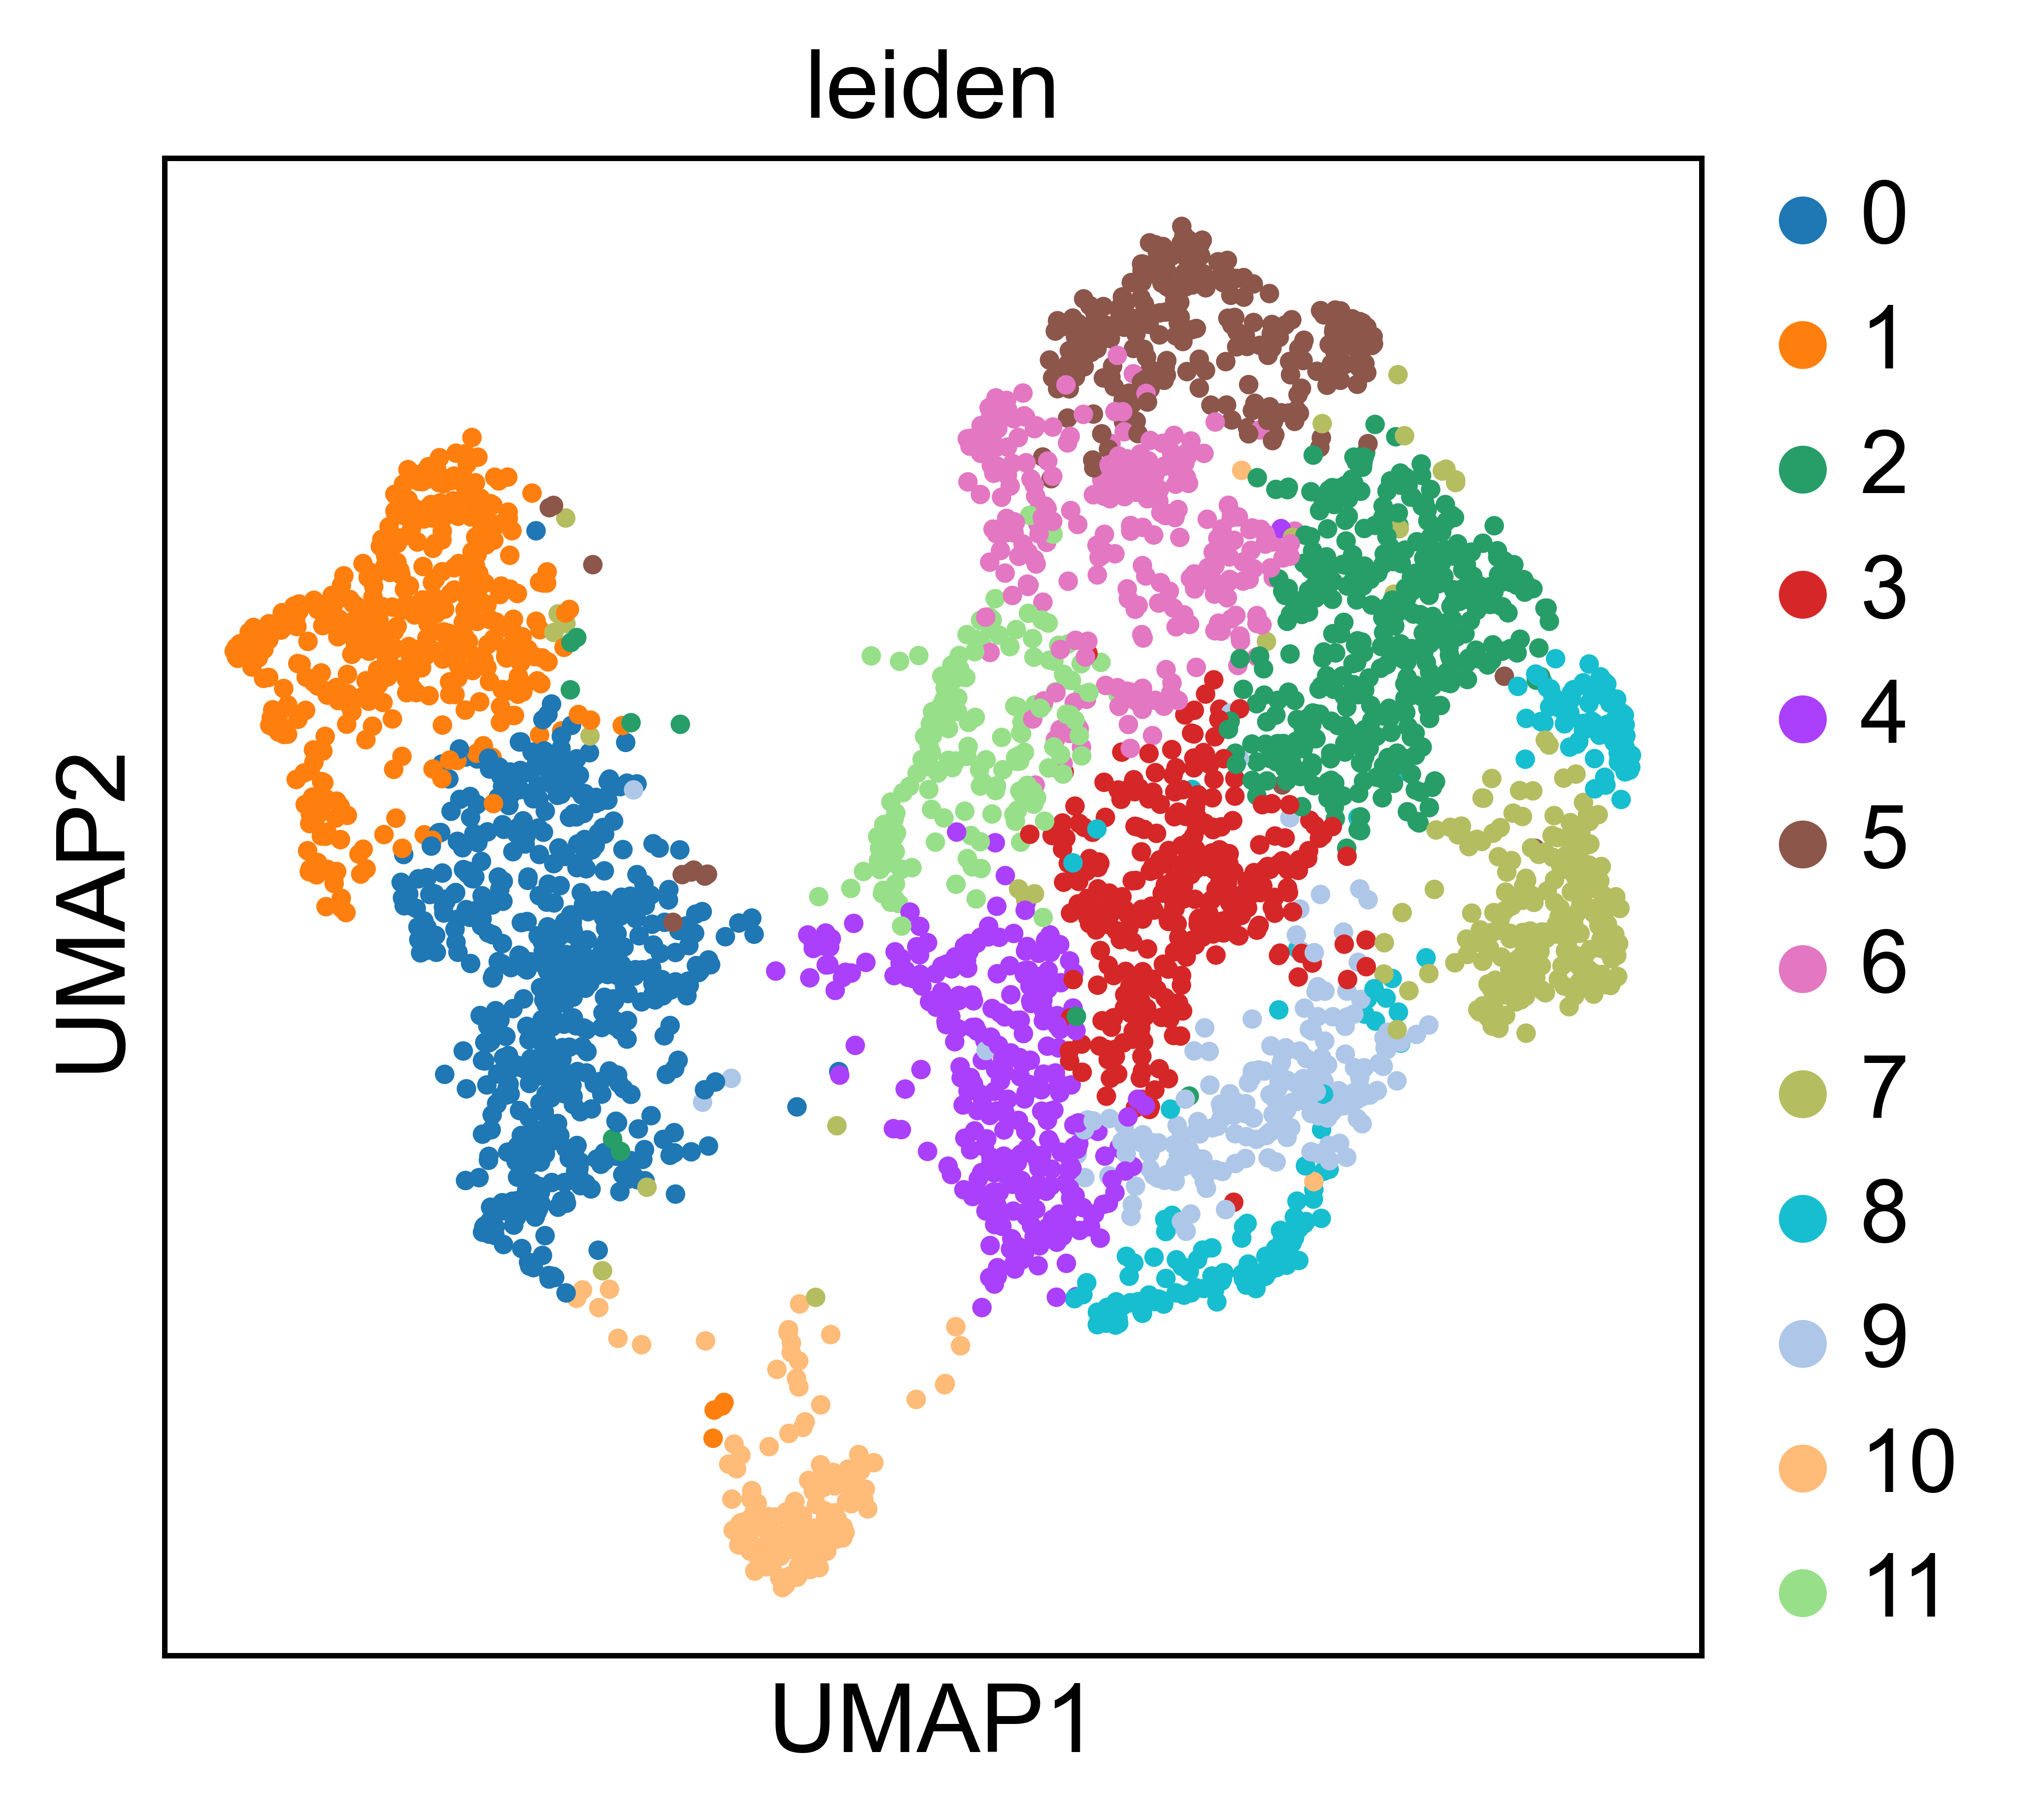

In [10]:
sc.tl.leiden(adata,resolution=1)
sc.pl.umap(adata, color = ["leiden"])

In [11]:
pd.set_option('display.max_columns', None)
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
display(pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(20))


0             1             2             3             4  \
0   LOC102144039          ETS1         ARL5B           FOS       FAM212A   
1           CD74        FAM46C       ADCYAP1           JUN  LOC102137002   
2            LYZ  LOC102133263         NR4A3          RGS1         CCND1   
3   LOC102136468         PTPRC  LOC102124370  LOC101925240  LOC107129633   
4           SOD2  LOC101925857          CD83         DUSP1          SDPR   
5           GZMB          CD3D          ELL2          JUNB        MARCH1   
6         GPR183        IFITM1         GRASP         ZFP36          HHEX   
7            HBB          CD8A          LMNA          IER2        LHFPL2   
8          PLAC8         CXCR4      PPP1R15A         TXNIP           ND5   
9   LOC102140782          CD3G         MAPK6        DNAJB1         PSRC1   
10           CFD         IL2RB         VEGFA       TSC22D3          TPM2   
11  LOC102122418         PRKCH          FOSB          RGS2        PPFIA4   
12          G0S2      TNFRSF1B          EGR3          EGR1          LYL1   
13          APOE           LTB       GNPNAT1       ADCYAP1          GFI1   
14  LOC102137723       ZFP36L2        NFKBIZ          FOSB          DOK1   
15         MPEG1        STK17A         NCAPH         NR4A2      rna76576   
16  LOC102132662  LOC102137723         NR4A2         DDIT4       SNRNP70   
17          MNDA           FYB         FOSL2       GADD45B         EEF2K   
18          AIF1         CD247          CREM          TNS1         PLCB2   
19          IDO1  LOC102135442        CDKN1A          IER5          MLPH   

               5             6             7             8             9  \
0   LOC102141414  LOC102140002         BASP1          VMO1  LOC101925240   
1           LMNA        TMSB4X         TRAF1      TMEM176B           FOS   
2          ENPP4          RPL9  LOC102135658      TMEM176A          SCIN   
3   LOC102142071          TPT1          IFI6  LOC102142071         CCND1   
4          MAPK6         RPS23        FCGR1A           CPM           JUN   
5        TNFAIP3  LOC102125623          IL13        FCGR1A        FCGR1A   
6   LOC102141014         RPL30      PPP1R15A          YBX3         BASP1   
7       MARCKSL1         RPL31           DST       COL14A1         PODXL   
8        DENND4A         RPL10          HPGD         AMACR        COL6A1   
9          CRIP1           FTL         IFI27         PTPRB        COL6A2   
10          ELL2         RPL23       TP53BP2        PRSS57        ENTPD3   
11        CDKN1A         RPL41        ENTPD3         PADI2         VWA5A   
12         GSTM3        TMSB10          RRAD        PRSS23        FAM84A   
13         NEDD9  LOC102114865         DUSP6          PYGL          RGS1   
14        TBC1D1         RPS14           VIM         MMP25          MLPH   
15          SAV1           B2M         MAPK6           CLU       ALDH1A1   
16        ATP1B1           UBC         BIRC3  LOC102140229         ABCC4   
17         ATXN1         RPL11        SOWAHC          FGGY          CST3   
18        SQSTM1         RPL18        ENDOD1         ENPEP          CMA1   
19        SLAMF1         RPL35           HDC         RAB6B        STXBP5   

              10            11  
0          MKI67  LOC102141414  
1          STMN1  LOC102141014  
2           TUBB  LOC102142071  
3          TOP2A           JUN  
4   LOC107126576           FOS  
5           RRM2         GSTM3  
6   LOC102130495          LMO4  
7          CENPF          IL9R  
8          NCAPG        TESPA1  
9         TUBA1B          ACP5  
10          SMC2        MAN2B1  
11         HMGB2          RGS1  
12          SMC4        PRSS57  
13         SPAG5           CLU  
14         KIF11        FAM46A  
15          PRC1         TXNIP  
16         CENPM        LHFPL2  
17         CCNA2  LOC102139613  
18        NUCKS1         NTRK1  
19         BIRC5       TSC22D3

In [12]:
sc.pl.umap(adata, color=['CD3D', 'CD8A', 'GZMH',"SFTPB","KRT7"], vmax=3)

In [13]:
#clusters 0, 1 have "contaminant" (lymphocyte genes) so we will annoate as doublets to be removed
doublet_vals = ["0","1"]
doublet_ind = adata.obs.index[adata.obs['leiden'].isin(doublet_vals)]
adata_allcells.obs.loc[doublet_ind, 'Doublet'] = True

In [14]:
adata_allcells.write_h5ad("./Scanpy_H5AD/adata_CellBender_Scrublet_Srubed_for_publication.h5ad")